# Vader

In [2]:
!pip install vaderSentiment


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
vader_obj = SentimentIntensityAnalyzer()

## load data

In [6]:
import pandas as pd
file_path = '/Users/suqiulin/Downloads/100k.csv'
df=pd.read_csv(file_path)
df.head()

,author,body,created_utc,id,submission,subreddit,subreddit_id
0,ForeskinStealer420,A combination of (1) and (2) would make you th...,2024-09-14 22:40:45,ln5r3zv,1fgx26q,datascience,t5_2sptq
1,lakeland_nz,4. Shift to something less technically. Becom...,2024-09-14 22:54:52,ln5tqg8,1fgx26q,datascience,t5_2sptq
2,Moscow_Gordon,Maybe look into solution architect positions f...,2024-09-15 00:16:38,ln67tl2,1fgx26q,datascience,t5_2sptq
3,Numerous-Tip-5097,"Hey, I am on the same boat with less experienc...",2024-09-15 01:37:26,ln6jubq,1fgx26q,datascience,t5_2sptq
4,hornswoggle_choco05,I'd probably shake things up and try a new pat...,2024-09-15 01:58:02,ln6mtyc,1fgx26q,datascience,t5_2sptq


# Get sentiment on post level

In [7]:
def get_sentiment(text):
    if isinstance(text, str):
        return vader_obj.polarity_scores(text)
    else:
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}  # Return neutral for non-strings

In [8]:
df[['neg', 'neu', 'pos', 'compound']] = df['body'].apply(get_sentiment).apply(pd.Series)
df['polarity'] = df['compound'].apply(lambda x: 'pos' if x > 0 else ('neg' if x < 0 else 'neu'))

df.head(5)


,author,body,created_utc,id,submission,subreddit,subreddit_id,neg,neu,pos,compound,polarity
0,ForeskinStealer420,A combination of (1) and (2) would make you th...,2024-09-14 22:40:45,ln5r3zv,1fgx26q,datascience,t5_2sptq,0.000,0.859,0.141,0.8360,pos
1,lakeland_nz,4. Shift to something less technically. Becom...,2024-09-14 22:54:52,ln5tqg8,1fgx26q,datascience,t5_2sptq,0.000,0.954,0.046,0.4019,pos
2,Moscow_Gordon,Maybe look into solution architect positions f...,2024-09-15 00:16:38,ln67tl2,1fgx26q,datascience,t5_2sptq,0.000,0.811,0.189,0.8225,pos
3,Numerous-Tip-5097,"Hey, I am on the same boat with less experienc...",2024-09-15 01:37:26,ln6jubq,1fgx26q,datascience,t5_2sptq,0.041,0.840,0.119,0.8738,pos
4,hornswoggle_choco05,I'd probably shake things up and try a new pat...,2024-09-15 01:58:02,ln6mtyc,1fgx26q,datascience,t5_2sptq,0.057,0.671,0.272,0.7500,pos


In [ ]:
df = df[['body','id','compound','polarity']]

# Export and Visualize results

In [24]:
df.to_csv('/Users/suqiulin/Desktop/plp_practice_proj/sentiment analysis/sentiment_by_vader.csv', index=False)
print("Sentiment analysis results saved")

Sentiment analysis results saved


In [9]:
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [10]:
df['polarity'].value_counts()

polarity
pos    53084
neg    30340
neu    24297
Name: count, dtype: int64

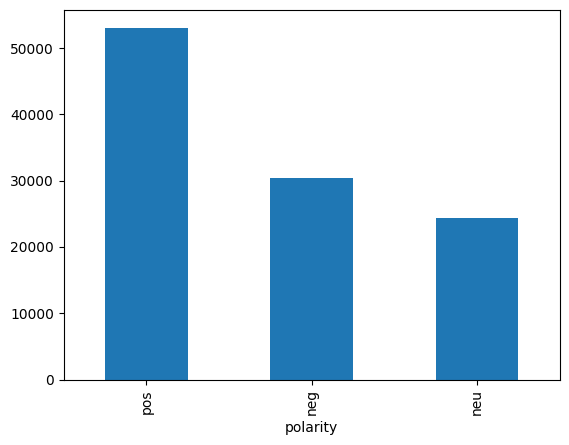

In [28]:
df['polarity'].value_counts().plot(kind='bar')
plt.show()


# Evaluation

In [11]:
import pandas as pd
file_path = '/Users/suqiulin/Downloads/Reddit_Data.csv'
df_eval=pd.read_csv(file_path)
df_eval.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [13]:
df_eval[['neg', 'neu', 'pos', 'compound']] = df_eval['clean_comment'].apply(get_sentiment).apply(pd.Series)
df_eval['predicted_polarity'] = df_eval['compound'].apply(lambda x: 'pos' if x > 0 else ('neg' if x < 0 else 'neu'))
df_eval['labeled_polarity'] = df_eval['category'].apply(lambda x: 'pos' if x > 0 else ('neg' if x < 0 else 'neu'))
df_eval.head()

,clean_comment,category,neg,neu,pos,compound,predicted_polarity,labeled_polarity
0,family mormon have never tried explain them t...,1,0.067,0.594,0.339,0.9349,pos,pos
1,buddhism has very much lot compatible with chr...,1,0.066,0.653,0.280,0.9953,pos,pos
2,seriously don say thing first all they won get...,-1,0.035,0.825,0.140,0.8750,pos,neg
3,what you have learned yours and only yours wha...,0,0.000,0.956,0.044,0.0772,pos,neu
4,for your own benefit you may want read living ...,1,0.102,0.704,0.194,0.8907,pos,pos


In [14]:
!pip install seaborn
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [15]:
y_true = df_eval['labeled_polarity']
y_pred = df_eval['predicted_polarity']
cm = confusion_matrix(y_true, y_pred, labels=['pos', 'neg', 'neu'])

# Compute accuracy
true_positives = cm.diagonal()
total_actual = cm.sum(axis=1)

# Calculate per-class accuracy
accuracy_per_class = true_positives / total_actual
accuracy_pos, accuracy_neg, accuracy_neu = accuracy_per_class


# Compute recall (per class average)
recall = recall_score(y_true, y_pred, average=None, labels=['pos', 'neg', 'neu'])

# Compute F1 Score
f1_scores = f1_score(y_true, y_pred, labels=['pos', 'neg', 'neu'], average=None)
f1_pos, f1_neg, f1_neu = f1_scores

# Type 1 Error (False Positive Rate) - per class
type_1_error = 1 - recall  # Since FPR = 1 - recall (when averaged across classes)

# Compute Type 2 Error (False Negative Rate)
# Type 2 error (FNR) is simply: 1 - recall per class
type_2_error = 1 - recall

# Output the results
print(f"Confusion Matrix:\n{cm}")
print(f"Recall (per class): {recall}")
print(f"Type 1 Error (per class): {type_1_error}")
print(f"Type 2 Error (per class): {type_2_error}")

# Print accuracy for each class
print(f"Accuracy for 'pos': {accuracy_pos}")
print(f"Accuracy for 'neg': {accuracy_neg}")
print(f"Accuracy for 'neu': {accuracy_neu}")

# Print F1 scores for each class
print(f"F1 Score for 'pos': {f1_pos}")
print(f"F1 Score for 'neg': {f1_neg}")
print(f"F1 Score for 'neu': {f1_neu}")

Confusion Matrix:
[[10835  3414  1581]
 [ 2023  5362   892]
 [ 2850  2388  7904]]
Recall (per class): [0.68445989 0.64781926 0.60143053]
Type 1 Error (per class): [0.31554011 0.35218074 0.39856947]
Type 2 Error (per class): [0.31554011 0.35218074 0.39856947]
Accuracy for 'pos': 0.684459886291851
Accuracy for 'neg': 0.6478192581853328
Accuracy for 'neu': 0.6014305280779181
F1 Score for 'pos': 0.6871076162090177
F1 Score for 'neg': 0.5516177151381102
F1 Score for 'neu': 0.6721374208087079


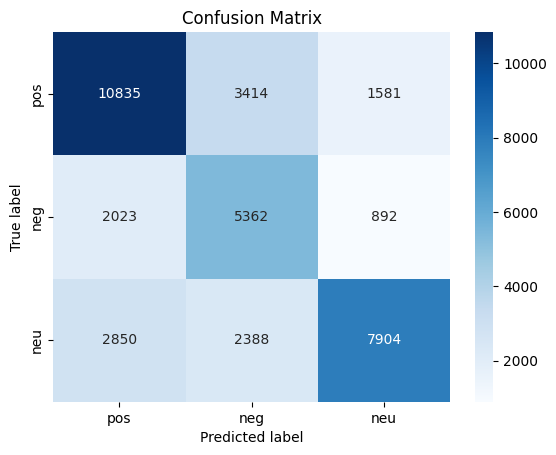

In [10]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['pos', 'neg', 'neu'], yticklabels=['pos', 'neg', 'neu'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()